In [171]:
import pandas as pd
import os
import requests
from config import pt_gkey
import gmaps
gmaps.configure(api_key=pt_gkey)

In [172]:
file_path = os.path.join("Resources","us-counties.csv")
df=pd.read_csv(file_path)

In [173]:
df.head()

,date,county,state,fips,cases,deaths
0,1/21/2020,Snohomish,Washington,53061.0,1,0
1,1/22/2020,Snohomish,Washington,53061.0,1,0
2,1/23/2020,Snohomish,Washington,53061.0,1,0
3,1/24/2020,Cook,Illinois,17031.0,1,0
4,1/24/2020,Snohomish,Washington,53061.0,1,0


In [174]:
df_new=df.dropna()

In [175]:
df_new.shape

(510299, 6)

In [5]:
#df_march=df_new[df_new['date']=='2020-03-11']

In [6]:
#df_march.sort_values(['cases'],ascending=False)

,date,county,state,fips,cases,deaths
1349,2020-03-11,King,Washington,53033.0,235,27
1290,2020-03-11,Westchester,New York,36119.0,120,0
1354,2020-03-11,Snohomish,Washington,53061.0,69,1
1180,2020-03-11,Santa Clara,California,6085.0,48,1
1255,2020-03-11,Middlesex,Massachusetts,25017.0,41,0
...,...,...,...,...,...,...
1242,2020-03-11,Johnson,Kansas,20091.0,1,0
1241,2020-03-11,Pottawattamie,Iowa,19155.0,1,0
1239,2020-03-11,St. Joseph,Indiana,18141.0,1,0
1238,2020-03-11,Noble,Indiana,18113.0,1,0


In [178]:
df_may=df_new[df_new['date']=='5/31/2020']

In [179]:
df_may.head()

,date,county,state,fips,cases,deaths
193780,5/31/2020,Autauga,Alabama,1001.0,221,4
193781,5/31/2020,Baldwin,Alabama,1003.0,290,9
193782,5/31/2020,Barbour,Alabama,1005.0,167,1
193783,5/31/2020,Bibb,Alabama,1007.0,75,1
193784,5/31/2020,Blount,Alabama,1009.0,62,1


In [180]:
df_may.reset_index(drop=True,inplace=True)

In [181]:
df_may.sort_values(['cases'],ascending=False)

,date,county,state,fips,cases,deaths
1743,5/31/2020,New York City,New York,36061.0,208085,21050
584,5/31/2020,Cook,Illinois,17031.0,77925,3642
193,5/31/2020,Los Angeles,California,6037.0,54996,2362
1742,5/31/2020,Nassau,New York,36059.0,40396,2615
1762,5/31/2020,Suffolk,New York,36103.0,39643,1949
...,...,...,...,...,...,...
1650,5/31/2020,Storey,Nevada,32029.0,1,0
1631,5/31/2020,Thomas,Nebraska,31171.0,1,0
1630,5/31/2020,Thayer,Nebraska,31169.0,1,0
1622,5/31/2020,Richardson,Nebraska,31147.0,1,0


In [182]:
dd=df_may[['fips','cases']]

In [183]:
dd

,fips,cases
0,1001.0,221
1,1003.0,290
2,1005.0,167
3,1007.0,75
4,1009.0,62
...,...,...
3039,56037.0,30
3040,56039.0,100
3041,56041.0,12
3042,56043.0,35


In [12]:
#gg=df_may.groupby(['fips'])

In [188]:
df_new_date=df_new[df_new['date']=='9/8/2020']

In [189]:
df_new_date.head()

,date,county,state,fips,cases,deaths
511829,9/8/2020,Autauga,Alabama,1001.0,1508,24
511830,9/8/2020,Baldwin,Alabama,1003.0,4757,46
511831,9/8/2020,Barbour,Alabama,1005.0,778,7
511832,9/8/2020,Bibb,Alabama,1007.0,589,9
511833,9/8/2020,Blount,Alabama,1009.0,1390,12


In [190]:
df_new_date.reset_index(inplace=True,drop=True)

In [191]:
df_new_date.head()

,date,county,state,fips,cases,deaths
0,9/8/2020,Autauga,Alabama,1001.0,1508,24
1,9/8/2020,Baldwin,Alabama,1003.0,4757,46
2,9/8/2020,Barbour,Alabama,1005.0,778,7
3,9/8/2020,Bibb,Alabama,1007.0,589,9
4,9/8/2020,Blount,Alabama,1009.0,1390,12


In [192]:
merged=pd.merge(df_new_date,dd,on='fips')

In [193]:
merged['rate']=(merged['cases_x']-merged['cases_y'])/merged['cases_y']

In [194]:
rate_df=merged.sort_values(['rate'],ascending=False)

In [195]:
rate_df.reset_index(drop=True,inplace=True)

In [196]:
rate_df.head()

,date,county,state,fips,cases_x,deaths,cases_y,rate
0,9/8/2020,Gulf,Florida,12045.0,846,13,1,845.0
1,9/8/2020,Bell,Kentucky,21013.0,430,9,1,429.0
2,9/8/2020,Harlan,Kentucky,21095.0,321,9,1,320.0
3,9/8/2020,Franklin,Florida,12037.0,569,3,2,283.5
4,9/8/2020,Brooks,Texas,48047.0,272,20,1,271.0


## Census Information

In [10]:
# Notes / comments from Tobias

# Please note that some 2019 Data for the ACS will be released on September 17th or later. Details found at the following: 
# https://www.census.gov/programs-surveys/acs/news/data-releases/2019/release-schedule.html

# Instead will get the 2014—2018 ACS 5-Year Narrative Profile. Snapshot / overview is at the following:     
# https://www.census.gov/acs/www/data/data-tables-and-tools/narrative-profiles/2018/report.php?geotype=nation&usVal=us

# Within this snapsot is education, employer type / industry,  occupation, how they commute to work,income, 
# population by age and sex, and type of housing (single family vs apartments / multi-unit). 

# Reference class example from Session 6.3 Geocoding on Census. 

In [11]:
# Python Wrapper for Census API 
from census import Census
import requests

In [12]:
# Census API Key
from config import api_key

ImportError: cannot import name 'api_key' from 'config' (C:\Rice Project-1\Repository\Rice-Project-1-G11\config.py)

In [ ]:
# provide the api key and the year to establish a session
c = Census(api_key, year=2018)

In [ ]:
# Set an option to allow up to 300 characters to print in each column
pd.set_option('max_colwidth', 300)

In [ ]:
# query for ACS tables
tables = c.acs5.tables()

In [ ]:
table_df=pd.DataFrame(tables)
table_df.head(50)

### Total Population

In [ ]:
# B01003 TOTAL POPULATION

table_id ='B01003'

url = table_df.loc[table_df['name']==table_id, 'variables'].values[0]

# Make API call
response = requests.get(url).json()

# convert the response to a DataFrame
variables = pd.DataFrame(response['variables']).transpose()

print(f"Number of available variables: {len(variables)}")
variables.head(10)

### Population by Gender

In [ ]:
# B98012 TOTAL POPULATION COVERAGE RATE BY SEX

table_id ='B98012'

url = table_df.loc[table_df['name']==table_id, 'variables'].values[0]

# Make API call
response = requests.get(url).json()

# convert the response to a DataFrame
variables = pd.DataFrame(response['variables']).transpose()

print(f"Number of available variables: {len(variables)}")
variables.head(10)

### Transportation to Work

In [ ]:
# B08301 MEANS OF TRANSPORTATION TO WORK

table_id ='B08301'

url = table_df.loc[table_df['name']==table_id, 'variables'].values[0]

# Make API call
response = requests.get(url).json()

# convert the response to a DataFrame
variables = pd.DataFrame(response['variables']).transpose()

print(f"Number of available variables: {len(variables)}")
variables.head(50)

In [ ]:
# B007011 TOTAL POPULATION

table_id ='B07011'

url = table_df.loc[table_df['name']==table_id, 'variables'].values[0]

# Make API call
response = requests.get(url).json()

# convert the response to a DataFrame
variables = pd.DataFrame(response['variables']).transpose()

print(f"Number of available variables: {len(variables)}")
variables.head(25)

In [ ]:
census_data = c.acs5.get(("NAME", "B07011_002E"), 
                         {'for': 'zip code tabulation area:*'})
census_data[:5]

### Select the Fields of Interest

In [ ]:
census_data = c.acs5.get(("NAME", "B01003_001E", "B98012_001E", "B98012_002E", "B08301_003E", "B08301_011E", 
                          "B08301_021E", "B07011_002E"), 
                         {'for': 'zip code tabulation area:*'})
census_data[:5]

### Create DataFrame

In [ ]:
# Create DataFrame

census_dataframe = pd.DataFrame(census_data)

# Format and update DataFrame
census_dataframe = census_dataframe.rename(columns={"B01003_001E": "Population",
                                                       "B98012_001E": "Population II",
                                                       "B98012_002E": "Male Population",
                                                       "B98012_003E": "Female Population",
                                                       "B08301_003E": "Drive to Work - Solo Driver", 
                                                       "B08301_011E": "Public Transportation",
                                                       "B08301_021E": "Work from Home", 
                                                       "NAME": "Name", 
                                                       "zip code tabulation area": "Zipcode"
                                                      })

census_dataframe.head()

In [ ]:
# Create a CSV File
census_dataframe.to_csv("Population+Drive+Median_Income_by_Zip.csv", index=False)

### Plot

In [ ]:
print(plt.style.available)

In [ ]:
# Generate a bar for top 100 county population
# using Matplotlib pyplot.

selected_population = k100.sort_values("Population", ascending = False)
selected_population = selected_population
population = selected_population[["Population"]]

rate = selected_population[["rate"]]

## Use DataFrame.plot to create a bar chart
plt.figure(1, figsize=(10,10))
population.plot(kind="bar", color = "blue", legend = False)


# Add titles. 

plt.title ("Population per County for Top 100")
plt.ylabel ("Population")
plt.xlabel ("County")
plt.ylim(0,14000000)
plt.xlim(-2,100)
plt.grid(False)
plt.savefig('Population-Top100.png', bbox_inches='tight')


# plt.show()

### Pankaj's Code below

In [248]:

location= os.path.join('cases-lat-lng.csv')
df_latlng=pd.read_csv(location)


In [249]:
df_latlng.head()

,date,county,state,fips,cases,deaths,Latitude,Longitude
0,9/8/2020,Autauga,Alabama,1001,1508,24,32.579182,-86.499655
1,9/8/2020,Baldwin,Alabama,1003,4757,46,30.601074,-87.776333
2,9/8/2020,Barbour,Alabama,1005,778,7,31.817290,-85.354965
3,9/8/2020,Bibb,Alabama,1007,589,9,32.956280,-87.142290
4,9/8/2020,Blount,Alabama,1009,1390,12,34.014515,-86.499655


In [250]:
df_latlng[df_latlng['fips']==36061]

,date,county,state,fips,cases,deaths,Latitude,Longitude
3203,9/8/2020,New York City,New York,36061,241141,23744,40.71455,-74.00712


In [251]:
df_latlng=df_latlng.drop(['deaths'],axis=1)

In [252]:
df_latlng.head()

,date,county,state,fips,cases,Latitude,Longitude
0,9/8/2020,Autauga,Alabama,1001,1508,32.579182,-86.499655
1,9/8/2020,Baldwin,Alabama,1003,4757,30.601074,-87.776333
2,9/8/2020,Barbour,Alabama,1005,778,31.817290,-85.354965
3,9/8/2020,Bibb,Alabama,1007,589,32.956280,-87.142290
4,9/8/2020,Blount,Alabama,1009,1390,34.014515,-86.499655


In [253]:
place =os.path.join('Resources','ZIP-COUNTY-FIPS_2018-03.csv')
df_fp=pd.read_csv(place)

In [254]:
df_fp.head()

,ZIP,STCOUNTYFP,CITY,STATE,COUNTYNAME,CLASSFP
0,36091,1001,Verbena,AL,Autauga County,H1
1,36758,1001,Plantersville,AL,Autauga County,H1
2,36006,1001,Billingsley,AL,Autauga County,H1
3,36067,1001,Prattville,AL,Autauga County,H1
4,36701,1001,Selma,AL,Autauga County,H1


In [255]:
df_fp[df_fp['STCOUNTYFP']==36061]

,ZIP,STCOUNTYFP,CITY,STATE,COUNTYNAME,CLASSFP
32050,10025,36061,New york,NY,New York County,H6
32051,10075,36061,New york,NY,New York County,H6
32052,10036,36061,New york,NY,New York County,H6
32053,10282,36061,New york,NY,New York County,H6
32054,10271,36061,New york,NY,New York County,H6
...,...,...,...,...,...,...
32174,10124,36061,New york,NY,New York County,H6
32175,10106,36061,New york,NY,New York County,H6
32176,10213,36061,New york,NY,New York County,H6
32177,10269,36061,New york,NY,New York County,H6


In [256]:
fp=df_fp.groupby('STCOUNTYFP')

In [257]:
#fp

In [258]:
place=os.path.join('Resources','census_dataframe.csv')
cen_df=pd.read_csv(place)

In [259]:
cen_df.head()

,Name,Population,Population II,Male Population,Drive to Work - Solo Driver,Public Transportation,Work from Home,Zipcode
0,ZCTA5 43964,8642,NaN,NaN,3173.0,0.0,75.0,43964
1,ZCTA5 28216,51116,NaN,NaN,20406.0,742.0,1499.0,28216
2,ZCTA5 28277,71605,NaN,NaN,28558.0,326.0,4072.0,28277
3,ZCTA5 28278,27286,NaN,NaN,11700.0,36.0,1282.0,28278
4,ZCTA5 28303,29414,NaN,NaN,11272.0,131.0,512.0,28303


In [260]:
data=cen_df[['Population','Zipcode']]

In [261]:
data_df=data.rename({'Zipcode':'ZIP'},axis=1)

In [262]:
data_df.head()

,Population,ZIP
0,8642,43964
1,51116,28216
2,71605,28277
3,27286,28278
4,29414,28303


In [263]:
zf=zipfp=pd.merge(data_df,df_fp,on='ZIP')

In [264]:
zf.head()

,Population,ZIP,STCOUNTYFP,CITY,STATE,COUNTYNAME,CLASSFP
0,8642,43964,39081,Toronto,OH,Jefferson County,H1
1,51116,28216,37119,Charlotte,NC,Mecklenburg County,H1
2,71605,28277,37119,Charlotte,NC,Mecklenburg County,H1
3,27286,28278,37119,Charlotte,NC,Mecklenburg County,H1
4,29414,28303,37051,Fayetteville,NC,Cumberland County,H1


In [265]:
zipfp.head()

,Population,ZIP,STCOUNTYFP,CITY,STATE,COUNTYNAME,CLASSFP
0,8642,43964,39081,Toronto,OH,Jefferson County,H1
1,51116,28216,37119,Charlotte,NC,Mecklenburg County,H1
2,71605,28277,37119,Charlotte,NC,Mecklenburg County,H1
3,27286,28278,37119,Charlotte,NC,Mecklenburg County,H1
4,29414,28303,37051,Fayetteville,NC,Cumberland County,H1


In [266]:
zipfp=zipfp.rename({'STCOUNTYFP':'fips'},axis=1)

In [267]:
zipfp.head()

,Population,ZIP,fips,CITY,STATE,COUNTYNAME,CLASSFP
0,8642,43964,39081,Toronto,OH,Jefferson County,H1
1,51116,28216,37119,Charlotte,NC,Mecklenburg County,H1
2,71605,28277,37119,Charlotte,NC,Mecklenburg County,H1
3,27286,28278,37119,Charlotte,NC,Mecklenburg County,H1
4,29414,28303,37051,Fayetteville,NC,Cumberland County,H1


In [268]:
g=zipfp.groupby('fips')['Population'].sum()

In [269]:
ss=pd.merge(df_latlng,g,on='fips')

In [270]:
ss.head()

,date,county,state,fips,cases,Latitude,Longitude,Population
0,9/8/2020,Autauga,Alabama,1001,1508,32.579182,-86.499655,105345
1,9/8/2020,Baldwin,Alabama,1003,4757,30.601074,-87.776333,227450
2,9/8/2020,Barbour,Alabama,1005,778,31.817290,-85.354965,30474
3,9/8/2020,Bibb,Alabama,1007,589,32.956280,-87.142290,84537
4,9/8/2020,Blount,Alabama,1009,1390,34.014515,-86.499655,157623


In [271]:
resetss=ss.sort_values('Population',ascending=False)

In [272]:
resetss.reset_index(inplace=True,drop=True)

In [273]:
resetss.head()

,date,county,state,fips,cases,Latitude,Longitude,Population
0,9/8/2020,Los Angeles,California,6037,249241,34.052234,-118.243685,10590304
1,9/8/2020,Cook,Illinois,17031,132079,41.737659,-87.697554,5671859
2,9/8/2020,Harris,Texas,48201,112039,29.775182,-95.310250,5047263
3,9/8/2020,Maricopa,Arizona,4013,136040,33.058106,-112.047642,4387308
4,9/8/2020,San Diego,California,6073,41140,32.715738,-117.161084,3419051


In [274]:
#resetss['Positivity_Rate']=(resetss['cases'])/(resetss['Population']/100000)

In [275]:
#resetss.head()

In [276]:
#resetss['Positivity_Rate']=resetss['Positivity_Rate'].map("{:.0f}".format)

In [277]:
#resetss['Positivity_Rate']=pd.to_numeric(resetss['Positivity_Rate'])

In [278]:
#resetss.head()

In [279]:
#resetss=resetss.sort_values((['Positivity_Rate']),ascending=False)

In [280]:
#resetss.reset_index(inplace=True,drop=True)

In [281]:
#Grabbing fips and population
gg=resetss[['fips','Population']]

In [282]:
rate_df.head()

,date,county,state,fips,cases_x,deaths,cases_y,rate
0,9/8/2020,Gulf,Florida,12045.0,846,13,1,845.0
1,9/8/2020,Bell,Kentucky,21013.0,430,9,1,429.0
2,9/8/2020,Harlan,Kentucky,21095.0,321,9,1,320.0
3,9/8/2020,Franklin,Florida,12037.0,569,3,2,283.5
4,9/8/2020,Brooks,Texas,48047.0,272,20,1,271.0


In [283]:
#adding population column to k100 by mergin on fips
k100=pd.merge(rate_df,gg,on='fips')

In [284]:
k100.head()

,date,county,state,fips,cases_x,deaths,cases_y,rate,Population
0,9/8/2020,Gulf,Florida,12045.0,846,13,1,845.0,16616
1,9/8/2020,Bell,Kentucky,21013.0,430,9,1,429.0,27729
2,9/8/2020,Harlan,Kentucky,21095.0,321,9,1,320.0,45656
3,9/8/2020,Franklin,Florida,12037.0,569,3,2,283.5,20951
4,9/8/2020,Brooks,Texas,48047.0,272,20,1,271.0,7430


In [285]:
k100[k100['fips']==36061]

,date,county,state,fips,cases_x,deaths,cases_y,rate,Population
3021,9/8/2020,New York City,New York,36061.0,241141,23744,208085,0.158858,1693174


In [297]:
#grabbing population over 100k
k101=k100[k100['Population']>100000]

In [298]:
k100=k101[k101['fips']!=36061]

In [299]:
k100.head()

,date,county,state,fips,cases_x,deaths,cases_y,rate,Population
0,9/8/2020,Tehama,California,6103.0,453,1,4,112.250000,144905
1,9/8/2020,Bingham,Idaho,16011.0,676,9,7,95.571429,121264
2,9/8/2020,Stone,Missouri,29209.0,316,2,4,78.000000,121684
3,9/8/2020,Sebastian,Arkansas,5131.0,3042,38,40,75.050000,142299
4,9/8/2020,Portage,Wisconsin,55097.0,798,2,11,71.545455,143879


In [300]:
#dataframe sorted by rate for population over 100k
k100.sort_values(['rate'],ascending=False)

,date,county,state,fips,cases_x,deaths,cases_y,rate,Population
0,9/8/2020,Tehama,California,6103.0,453,1,4,112.250000,144905
1,9/8/2020,Bingham,Idaho,16011.0,676,9,7,95.571429,121264
2,9/8/2020,Stone,Missouri,29209.0,316,2,4,78.000000,121684
3,9/8/2020,Sebastian,Arkansas,5131.0,3042,38,40,75.050000,142299
4,9/8/2020,Portage,Wisconsin,55097.0,798,2,11,71.545455,143879
...,...,...,...,...,...,...,...,...,...
966,9/8/2020,Sullivan,New York,36105.0,1544,37,1387,0.113194,147007
967,9/8/2020,Hudson,New Jersey,34017.0,20453,1512,18419,0.110429,684355
968,9/8/2020,Orange,New York,36071.0,11550,410,10421,0.108339,416758
969,9/8/2020,Union,New Jersey,34039.0,17404,1354,15821,0.100057,837367


In [301]:
k100.reset_index(drop=True,inplace=True)

In [302]:
k100.head()

,date,county,state,fips,cases_x,deaths,cases_y,rate,Population
0,9/8/2020,Tehama,California,6103.0,453,1,4,112.250000,144905
1,9/8/2020,Bingham,Idaho,16011.0,676,9,7,95.571429,121264
2,9/8/2020,Stone,Missouri,29209.0,316,2,4,78.000000,121684
3,9/8/2020,Sebastian,Arkansas,5131.0,3042,38,40,75.050000,142299
4,9/8/2020,Portage,Wisconsin,55097.0,798,2,11,71.545455,143879


In [303]:
import matplotlib.pyplot as plt
import scipy.stats as sts
from random import random
import numpy as np

In [111]:
np.random.seed(19680801)
colors = k100['cases_y']

(0.0, 1000.0)

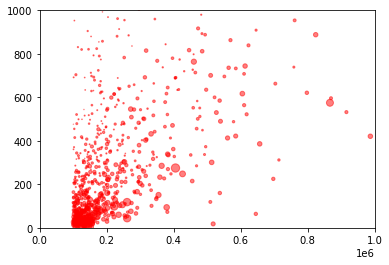

In [304]:
plt.scatter(k100['Population'],k100['cases_y'],s=k100['rate'],c='red',alpha=0.5)
plt.xlim(0,1000000)
plt.ylim(0,1000)

In [305]:
corr= sts.pearsonr(k100['Population'],k100['cases_y'])

In [306]:
corr

(0.7103176008195793, 8.638811460049059e-150)

In [307]:
ktop100=k100.head(100)

In [308]:
df_latlng.head()

,date,county,state,fips,cases,Latitude,Longitude
0,9/8/2020,Autauga,Alabama,1001,1508,32.579182,-86.499655
1,9/8/2020,Baldwin,Alabama,1003,4757,30.601074,-87.776333
2,9/8/2020,Barbour,Alabama,1005,778,31.817290,-85.354965
3,9/8/2020,Bibb,Alabama,1007,589,32.956280,-87.142290
4,9/8/2020,Blount,Alabama,1009,1390,34.014515,-86.499655


In [309]:
#declaring lat long to add to top-100
df_sub=df_latlng[['fips','Latitude','Longitude']]

In [310]:
type(df_sub)

pandas.core.frame.DataFrame

In [311]:
ktop100.head()

,date,county,state,fips,cases_x,deaths,cases_y,rate,Population
0,9/8/2020,Tehama,California,6103.0,453,1,4,112.250000,144905
1,9/8/2020,Bingham,Idaho,16011.0,676,9,7,95.571429,121264
2,9/8/2020,Stone,Missouri,29209.0,316,2,4,78.000000,121684
3,9/8/2020,Sebastian,Arkansas,5131.0,3042,38,40,75.050000,142299
4,9/8/2020,Portage,Wisconsin,55097.0,798,2,11,71.545455,143879


In [312]:
#adding lat long to top-100
ktop100=pd.merge(ktop100,df_sub,on='fips')

In [313]:
ktop100.shape

(100, 11)

In [314]:
ktop100.head()

,date,county,state,fips,cases_x,deaths,cases_y,rate,Population,Latitude,Longitude
0,9/8/2020,Tehama,California,6103.0,453,1,4,112.250000,144905,40.027102,-122.123323
1,9/8/2020,Bingham,Idaho,16011.0,676,9,7,95.571429,121264,43.211230,-112.362415
2,9/8/2020,Stone,Missouri,29209.0,316,2,4,78.000000,121684,36.774888,-93.459933
3,9/8/2020,Sebastian,Arkansas,5131.0,3042,38,40,75.050000,142299,35.226040,-94.315422
4,9/8/2020,Portage,Wisconsin,55097.0,798,2,11,71.545455,143879,43.539149,-89.462620


In [315]:
output=os.path.join('Resources','ktop100latlng.csv')
ktop100.to_csv(output,index=False,header=True)

In [ ]:
# top5=resetss.head()

In [ ]:
#top5

In [ ]:
pt_locations =top5[['Latitude','Longitude']]
pt_cases=top5['Positivity_Rate'].astype(float)
pt_maxx=top5['Positivity_Rate'].max()


In [ ]:
fig=gmaps.figure()
heat_layer=gmaps.heatmap_layer(pt_locations,weights=pt_cases,dissipating=False,max_intensity=pt_maxx,point_radius=0.9)

In [ ]:
fig.add_layer(heat_layer)

In [ ]:
fig

In [ ]:
info_box_template = """
<dl>
<dt>County</dt><dd>{county}</dd>
<dt>State</dt><dd>{state}</dd>
<dt>Cases</dt><dd>{Positivity_Rate}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
covid_info = [info_box_template.format(**row) for index, row in top5.iterrows()]
locations = top5[["Latitude","Longitude"]]


In [ ]:
marker_layer=gmaps.marker_layer(locations,info_box_content=covid_info)
fig.add_layer(marker_layer)

In [ ]:
fig